# Basics EDA on Tweets
This notebook will contain some code for doing some basics text analysis and EDA

In [50]:
import pandas as pd
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np


### Import data

In [129]:
df = pd.read_csv('C:/Users/naemi/OneDrive/Dokumente/Propulsion/04_Data_Final_Project/Twitter_Posts/df_1M_new.csv')

In [21]:
df.shape

(1223215, 9)

In [91]:
df

,User,Date_Created,Number of Likes,Tweet,Retweets,Language,Mentioned Users,Source of Tweet,Month,Year,Day
0,FergieTime876,2022-10-21 23:59:24+00:00,2,No nonsense! 💪 #Gaff #mufc #ErikTenHag 🔴 https...,1,it,NaN,Twitter for Android,10,2022,21
1,mufcMPB,2022-10-21 23:58:23+00:00,6726,Erik ten Hag wants Cristiano Ronaldo to say so...,370,en,"[User(username='FabrizioRomano', id=330262748,...",Twitter for iPhone,10,2022,21
2,ADNFerguson,2022-10-21 23:58:04+00:00,20,En medio de un gran golpe surgió otra tormenta...,4,es,NaN,Twitter for Android,10,2022,21
3,MiguelA82859042,2022-10-21 23:57:03+00:00,9,El Mejor Jugador de La Historia del Madrid \n\...,2,es,NaN,Twitter for Android,10,2022,21
4,KhashanDalia,2022-10-21 23:56:31+00:00,8,Fair enough tbh. Those players look up to him ...,1,en,NaN,Twitter for Android,10,2022,21
...,...,...,...,...,...,...,...,...,...,...,...
1223210,WesExpressFTBL,2022-04-30 00:04:21+00:00,0,and then protests will be more effective and p...,0,en,NaN,Twitter for Android,4,2022,30
1223211,Jhozharo,2022-04-30 00:02:58+00:00,2,"Rangnick : ""Il [Sancho] a une inflammation des...",0,fr,NaN,Twitter Brave,4,2022,30
1223212,Gindy,2022-04-30 00:00:49+00:00,0,Mason Greenwood: Police to extend rape-accused...,1,en,NaN,Twitter for iPhone,4,2022,30
1223213,FootballocksRob,2022-04-30 00:00:29+00:00,0,Check out the latest #footballocks. I get angr...,0,en,NaN,Twitter for Android,4,2022,30


#### basic analysis on columns

In [128]:
df['Source of Tweet'].unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter for Mac',
       'SocialBee.io v2', 'Twitter Web App', 'Hootsuite Inc.',
       'twittbot.net', 'Twittimer', 'United Addict Es',
       'Twitter Media Studio', 'TweetDeck', 'IFTTT',
       'Microsoft Power Platform', 'Dynamic Tweets', 'Planable',
       'Twitter for iPad', 'ToJapBot', 'Chorus publishing platform',
       'bold.dk newsfeed', 'MUFC_Telegram', 'ManUtd_PL',
       '1footballstats-website-int', 'Tweetbot for iΟS',
       'Manchester United Rooter', 'Twitter for Advertisers', 'Buffer',
       'LTTV Nigeria', 'Periscope', 'WordPress.com', 'THEDOTBEST',
       'BestTLDApp', 'LaterMedia', 'BestTLD', 'Eyefootball Tweet Post',
       'Fenix 2', 'OverCoffee', 'Voetbalkrant.com', 'Loomly',
       'omniversee', 'ManchesterCityBeatUtd', 'Whose Giggsy?', 'Walfoot',
       'TM Poster', 'Sprout Social', 'Tweetlogix', 'Echobox',
       'CleverPush', 'Agorapulse app', 'PremierInjuries',
       'ManUtdinPidgin', 'PressBox Graphic

#### Check Nan Value

<AxesSubplot: >

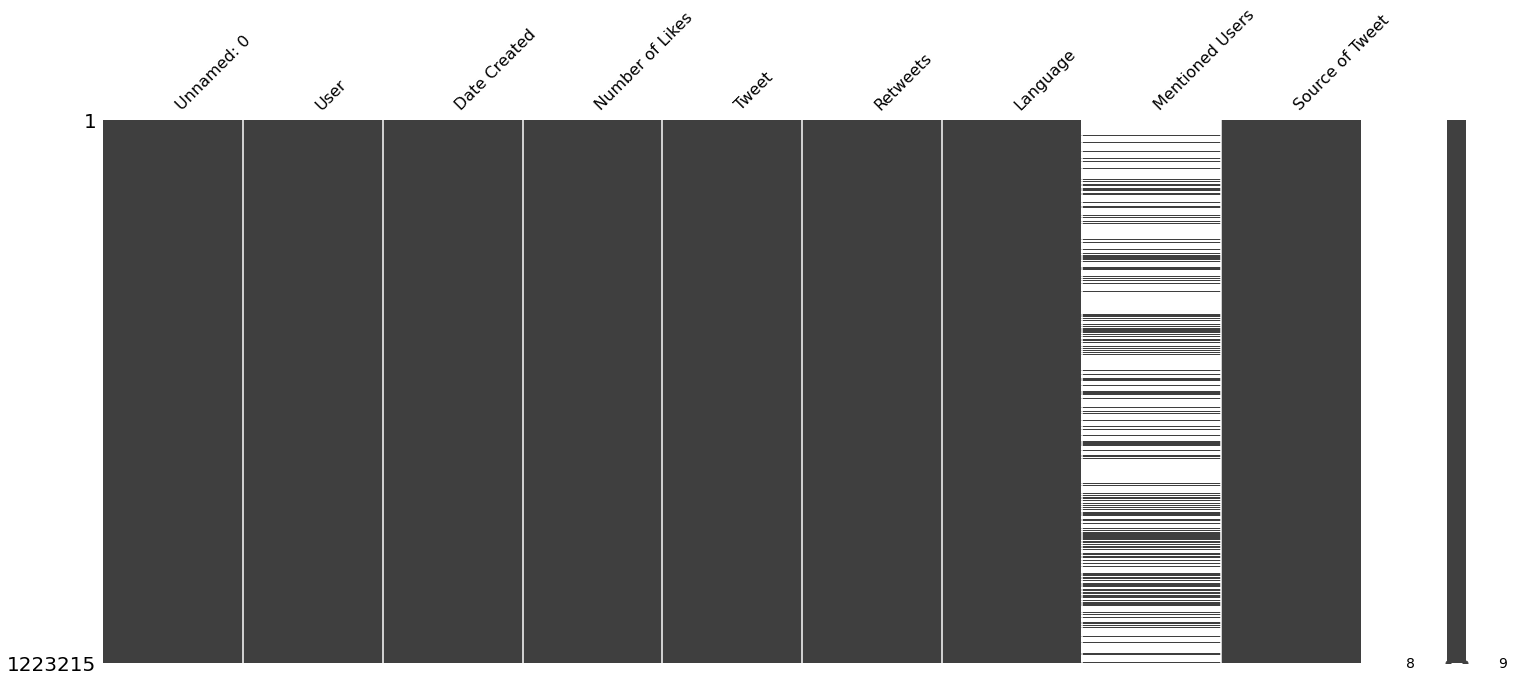

In [25]:
msno.matrix(df)

### Visualize some statistics

In [46]:
# Group by language for having a overview if we need translation
df_groupped_language = df.groupby(["Language"]).agg(count = ('Language',"size")).reset_index()
df_groupped_language

,Language,count
0,am,24
1,ar,19634
2,bg,51
3,bn,14
4,ca,987
5,ckb,1
6,cs,326
7,cy,631
8,da,3531
9,de,8341


In [47]:
df_groupped_language=df_groupped_language.sort_values(by=['count'], ascending=False)
df_groupped_language

,Language,count
11,en,1009829
12,es,29092
22,in,26305
17,fr,20878
1,ar,19634
54,und,17363
40,qme,16266
26,ja,12712
38,pt,9357
50,th,9266


In [58]:

fig = px.histogram(df_groupped_language, x="Language", y='count',title="Most used language for the posts")
fig.show()

In [ ]:
df = df.drop(['Unnamed: 0'],axis = 1)

#### Split Date column for checking tweet frequency by Month in a figure

In [69]:
df.rename(columns = {'Date Created':'Date_Created'}, inplace = True)

In [70]:
df['Date_Created'] = pd.to_datetime(df.Date_Created, format='%Y-%m-%d %H:%M:%S')

In [92]:
df['Month'] = df['Date_Created'].dt.month
df['Year'] = df['Date_Created'].dt.year
df['Day'] = df['Date_Created'].dt.day
df['Week_Day'] = df['Date_Created'].dt.dayofweek

In [83]:
df_groupped_Month_Year = df.groupby(["Month", "Year"]).agg(count_of_Posts = ("Year", "size")).reset_index()
df_groupped_Month_Year= df_groupped_Month_Year.drop(0)

df_groupped_Month_Year

,Month,Year,count_of_Posts
1,5,2022,146807
2,6,2022,144713
3,7,2022,238008
4,8,2022,387340
5,9,2022,163951
6,10,2022,139749


In [ ]:

fig = px.bar(df_groupped_Month_Year,
             x="Month",
             y='count_of_Posts',
             title="Count of posts per month #MUFC",
             labels={
                     "Month": "Month 2022",
                     "count_of_Posts": "Count of posts",
                                  },
             text_auto=True)
fig.show()

#### Split Date column for checking tweet frequency by Weekday in a figure

In [97]:
Week_Day = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday',
}

In [107]:
df_groupped_weekday = df.groupby(["Week_Day"]).agg(count_of_Posts = ("Week_Day", "size")).reset_index()
#df_groupped_weekday= df_groupped_Month_Year.drop(0)
df_groupped_weekday['Week_Day_New'] = df_groupped_weekday['Week_Day'].map(Week_Day)

df_groupped_weekday

,Week_Day,count_of_Posts,Week_Day_New
0,0,182615,Monday
1,1,150696,Tuesday
2,2,151538,Wednesday
3,3,189687,Thursday
4,4,146896,Friday
5,5,176163,Saturday
6,6,225620,Sunday


In [111]:
fig = px.bar(df_groupped_weekday,
             x="Week_Day_New",
             y='count_of_Posts',
             title="Count of posts per weekday #MUFC",
             labels={
                     "Week_Day_New": "Weekday",
                     "count_of_Posts": "Count of posts",
                                  },
             text_auto=True)
fig.show()

#### Check how many users tweet how often within 6 month

In [114]:
data_user=df.groupby(['User']).size().reset_index(name
    = 'tweets')

In [122]:
cut_bins = [0,10, 50, 100, 300, 500,1000, 10000, 20000]
#df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)

data_user['cat']=pd.cut(data_user['tweets'], bins=cut_bins)
bar=data_user['cat'].sort_values().value_counts()
bar=pd.DataFrame(bar).reset_index()
bar

,index,cat
0,"(0, 10]",102444
1,"(10, 50]",9056
2,"(50, 100]",1634
3,"(100, 300]",1165
4,"(300, 500]",206
5,"(500, 1000]",148
6,"(1000, 10000]",125
7,"(10000, 20000]",1
